<a href="https://colab.research.google.com/github/shubham-kajaria/Autoencoder-Decoder/blob/master/119220254_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Shubham Kajaria
#### 119220254

By submitting this exam, I declare

(1) that all work of it is my own;

(2) that I did not seek whole or partial solutions for any part of my submission from others; and

(3) that I did not and will not discuss, exchange, share, or publish complete or partial solutions for this exam or any part of it.

## **Task 1 for Basic Autoencoder Assignment**


In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.2.0-rc3


### **Task 1 Dense Architecture (Given Model)**

```
Encoder: 2 Layers (128, 128)

Decoder: 2 Layers (128, 784)

Optimizer: Adam

Loss Function: MSE

Learning Rate: 1e-2

```



In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

### Data Dimensions:
x_train: (60000, 784)

x_test: (10000, 784)


In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 8.98314380645752
Epoch 2/100. Loss: 5.490747451782227
Epoch 3/100. Loss: 4.940412998199463
Epoch 4/100. Loss: 4.7158284187316895
Epoch 5/100. Loss: 4.568533420562744
Epoch 6/100. Loss: 4.514721393585205
Epoch 7/100. Loss: 4.463785171508789
Epoch 8/100. Loss: 4.408804893493652
Epoch 9/100. Loss: 4.3998236656188965
Epoch 10/100. Loss: 4.36830472946167
Epoch 11/100. Loss: 4.337597370147705
Epoch 12/100. Loss: 4.3113226890563965
Epoch 13/100. Loss: 4.2853617668151855
Epoch 14/100. Loss: 4.282034397125244
Epoch 15/100. Loss: 4.256686687469482
Epoch 16/100. Loss: 4.26949405670166
Epoch 17/100. Loss: 4.2189860343933105
Epoch 18/100. Loss: 4.229558944702148
Epoch 19/100. Loss: 4.204945087432861
Epoch 20/100. Loss: 4.206653118133545
Epoch 21/100. Loss: 4.195071220397949
Epoch 22/100. Loss: 4.1844258308410645
Epoch 23/100. Loss: 4.175231456756592
Epoch 24/100. Loss: 4.171982765197754
Epoch 25/100. Loss: 4.162715911865234
Epoch 26/100. Loss: 4.172144889831543
Epoch 27/100. Loss

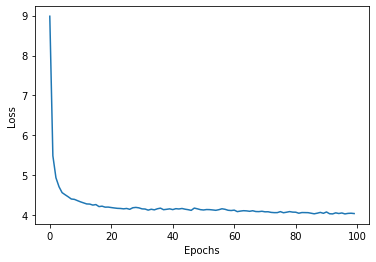

In [0]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Output from the given Dense Basic model**

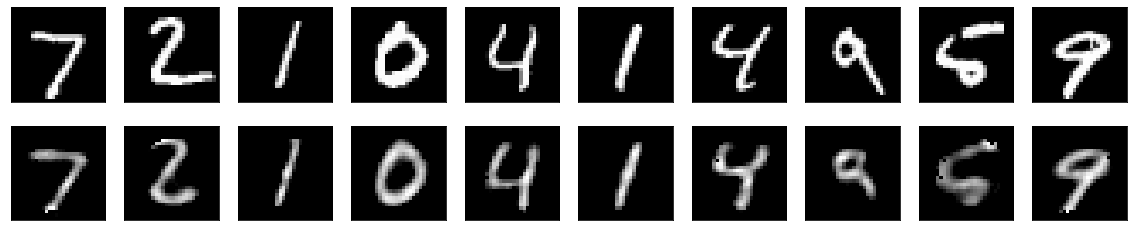

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    orig = x_test[index].reshape(28, 28)
    plt.imshow(orig)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    predict = model(x_test)[index].numpy().reshape(28, 28)
    plt.imshow(predict)
    # print(loss(predict, orig))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### **Hyper-parameter Initialisation:**

#### The following variables will be used throughout Task 1


In [0]:
batch_size = 256
max_epochs = 100
hidden_dimension = [64, 128, 256, 512]
original_dimension = 784
learning_rate = [1e-2, 1e-3]

### **Task 1 Dense Architecture 1**

#### Changes implemented:
```
Encoder: 3 Layers (256, 128, 128)

Decoder: 3 Layers (128, 256, 784)

Optimizer: Adam

Loss Function: MSE

Learning Rate: 1e-3

```



In [0]:
class Encoder_1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_1, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim[2], activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim[1], activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim[1], activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer1(input_features)
        activation = self.hidden_layer2(activation)
        return self.output_layer(activation)

In [0]:
class Decoder_1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_1, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim[1], activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim[2], activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer1(code)
        activation = self.hidden_layer2(activation)
        return self.output_layer(activation)

In [0]:
class Autoencoder_1(tf.keras.Model):
    def __init__(self, intermediate_dim, original_dim):
      super(Autoencoder_1, self).__init__()
      self.loss = []
      self.encoder = Encoder_1(intermediate_dim=intermediate_dim)
      self.decoder = Decoder_1(intermediate_dim=intermediate_dim, original_dim=original_dim)

    def call(self, input_features):
      code = self.encoder(input_features)
      reconstructed = self.decoder(code)
      return reconstructed

In [0]:
model = Autoencoder_1(intermediate_dim=hidden_dimension, original_dim=original_dimension)
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate[1])
train_loop(model, opt, loss, training_dataset, max_epochs)

Epoch 1/100. Loss: 8.075967788696289
Epoch 2/100. Loss: 3.747929573059082
Epoch 3/100. Loss: 3.0963103771209717
Epoch 4/100. Loss: 2.795161008834839
Epoch 5/100. Loss: 2.5953142642974854
Epoch 6/100. Loss: 2.4493370056152344
Epoch 7/100. Loss: 2.339719533920288
Epoch 8/100. Loss: 2.267683267593384
Epoch 9/100. Loss: 2.199741840362549
Epoch 10/100. Loss: 2.149095296859741
Epoch 11/100. Loss: 2.089437246322632
Epoch 12/100. Loss: 2.0603766441345215
Epoch 13/100. Loss: 2.0186049938201904
Epoch 14/100. Loss: 1.9856514930725098
Epoch 15/100. Loss: 1.9460370540618896
Epoch 16/100. Loss: 1.924573540687561
Epoch 17/100. Loss: 1.8958830833435059
Epoch 18/100. Loss: 1.8794764280319214
Epoch 19/100. Loss: 1.8612338304519653
Epoch 20/100. Loss: 1.841485857963562
Epoch 21/100. Loss: 1.827916145324707
Epoch 22/100. Loss: 1.8072785139083862
Epoch 23/100. Loss: 1.7888418436050415
Epoch 24/100. Loss: 1.7946481704711914
Epoch 25/100. Loss: 1.7699040174484253
Epoch 26/100. Loss: 1.7646135091781616
Epoch 

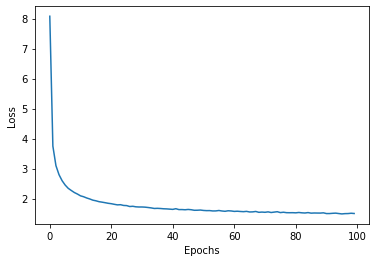

In [0]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

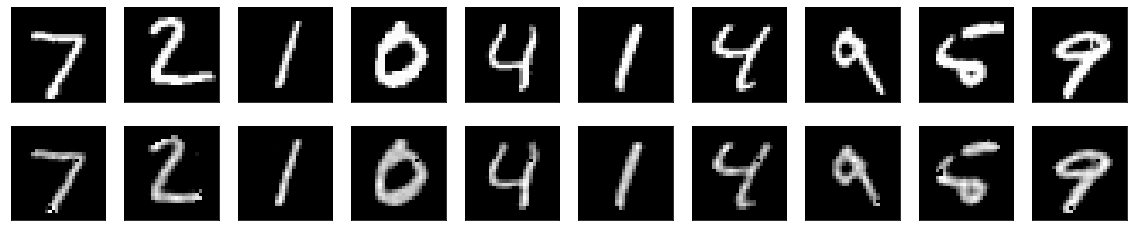

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    orig = x_test[index].reshape(28, 28)
    plt.imshow(orig)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    predict = model(x_test)[index].numpy().reshape(28, 28)
    plt.imshow(predict)
    # print(loss(predict, orig))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### **Task 1 Dense Architecture 2**

#### Changes implemented:

```
Encoder: 3 Layers (512, 256, 128)

Decoder: 3 Layers (256, 512, 784)

Optimizer: Adam

Loss Function: MSE

Learning Rate: 1e-3

```



In [0]:
class Encoder_2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_2, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim[3], activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim[2], activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim[1], activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer1(input_features)
        activation = self.hidden_layer2(activation)
        return self.output_layer(activation)

In [0]:
class Decoder_2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_2, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim[2], activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim[3], activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)
  
    def call(self, code):
        activation = self.hidden_layer1(code)
        activation = self.hidden_layer2(activation)
        return self.output_layer(activation)

In [0]:
class Autoencoder_2(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_2, self).__init__()
    self.loss = []
    self.encoder = Encoder_2(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_2(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
model = Autoencoder_2(intermediate_dim=hidden_dimension, original_dim=original_dimension)
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate[1])
train_loop(model, opt, loss, training_dataset, max_epochs)

Epoch 1/100. Loss: 10.745099067687988
Epoch 2/100. Loss: 3.6609528064727783
Epoch 3/100. Loss: 2.633647918701172
Epoch 4/100. Loss: 2.1532726287841797
Epoch 5/100. Loss: 1.8629339933395386
Epoch 6/100. Loss: 1.648823857307434
Epoch 7/100. Loss: 1.511769413948059
Epoch 8/100. Loss: 1.4051339626312256
Epoch 9/100. Loss: 1.3227308988571167
Epoch 10/100. Loss: 1.2515703439712524
Epoch 11/100. Loss: 1.183127999305725
Epoch 12/100. Loss: 1.1144036054611206
Epoch 13/100. Loss: 1.0625895261764526
Epoch 14/100. Loss: 1.0132189989089966
Epoch 15/100. Loss: 0.9723683595657349
Epoch 16/100. Loss: 0.9482519626617432
Epoch 17/100. Loss: 0.9428051710128784
Epoch 18/100. Loss: 0.9212170243263245
Epoch 19/100. Loss: 0.902773916721344
Epoch 20/100. Loss: 0.8633146286010742
Epoch 21/100. Loss: 0.8192622661590576
Epoch 22/100. Loss: 0.7870182991027832
Epoch 23/100. Loss: 0.7648088932037354
Epoch 24/100. Loss: 0.7531303763389587
Epoch 25/100. Loss: 0.7308832406997681
Epoch 26/100. Loss: 0.7454978823661804


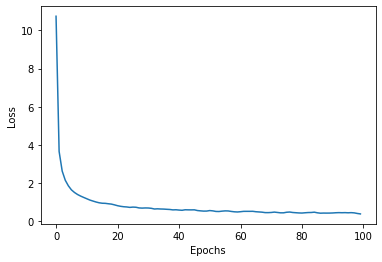

In [0]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

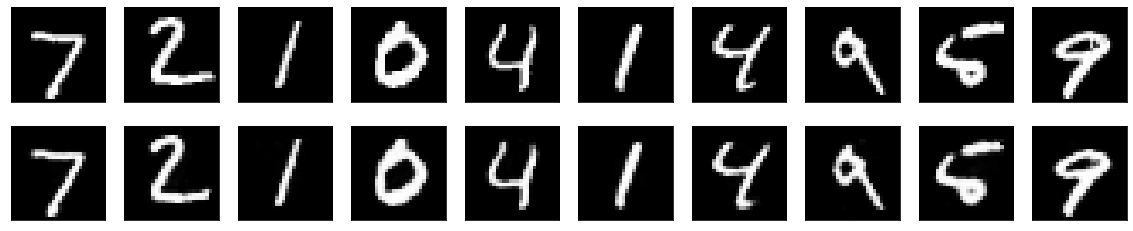

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    orig = x_test[index].reshape(28, 28)
    plt.imshow(orig)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    predict = model(x_test)[index].numpy().reshape(28, 28)
    plt.imshow(predict)
    # print(loss(predict, orig))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### **Task 1 CNN Architecture (Given Model)**

```
Encoder: 6 Layers 
3 Convolution(16, 8, 8)
3 Max Pooling(size = 2)

Decoder: 7 Layers
4 Convolution(8, 8, 16, 1)
3 Max Pooling(size = 2)

Batch size = 128
Optimizer: Adadelta
Loss Function: Binary Crossentropy

```



In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder_cnn = tf.keras.models.Model(input_img, decoded)
autoencoder_cnn.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder_cnn.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.7010 - val_loss: 0.6985
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6961 - val_loss: 0.6934
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6906 - val_loss: 0.6875
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6837 - val_loss: 0.6792
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6718 - val_loss: 0.6617
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6363 - val_loss: 0.5969
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5391 - val_loss: 0.5023
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4888 - val_loss: 0.4861
Epoch 9/100
469/469 [==============================] - 3s 5ms/step - loss: 0.4776 - val_loss: 0.4779
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4706 - val_lo

***Output from the given CNN Basic model***

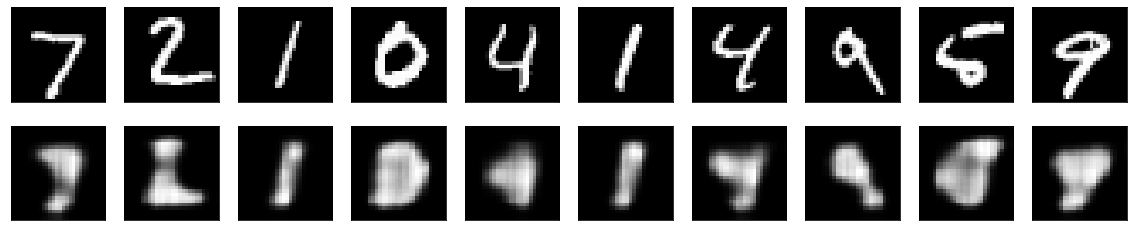

In [0]:
decoded_imgs = autoencoder.predict(x_test)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    orig = x_test[index].reshape(28, 28)
    plt.imshow(orig)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    predict = decoded_imgs[index].reshape(28, 28)
    plt.imshow(predict)
    # print(loss(predict, orig))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### **Task 1 CNN Architecture 1**

#### Changes implemented:

```
Encoder: 6 Layers 
3 Convolution(32, 16, 8)
3 Max Pooling(size = 2)

Decoder: 7 Layers
4 Convolution(8, 16, 32, 1)
3 Max Pooling(size = 2)

Batch size = 128
Optimizer: Adadelta
Loss Function: Binary Crossentropy
Learning Rate: 1e-1

```



In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_1 = tf.keras.models.Model(input_img, decoded)
autoencoder_1.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 1e-1), loss='binary_crossentropy')

In [0]:
autoencoder_1.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2729 - val_loss: 0.1981
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1881 - val_loss: 0.1784
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1721 - val_loss: 0.1642
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1611 - val_loss: 0.1553
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1538 - val_loss: 0.1487
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1480 - val_loss: 0.1439
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1438 - val_loss: 0.1410
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1403 - val_loss: 0.1385
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1373 - val_loss: 0.1334
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1344 - val_lo

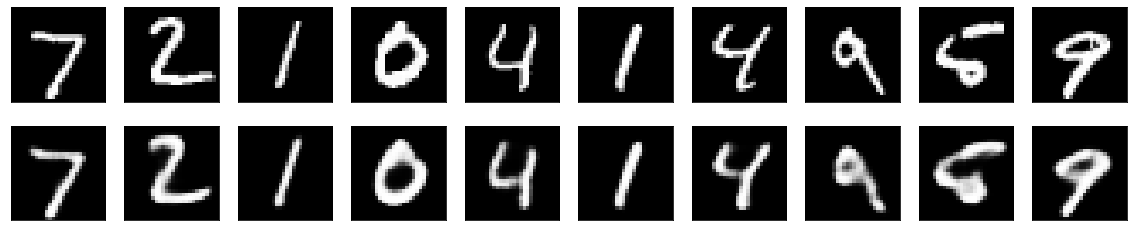

In [0]:
decoded_imgs = autoencoder_1.predict(x_test)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    orig = x_test[index].reshape(28, 28)
    plt.imshow(orig)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    predict = decoded_imgs[index].reshape(28, 28)
    plt.imshow(predict)
    # print(loss(predict, orig))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### **Task 1 CNN Architecture 2**

#### Changes implemented:

```
Encoder: 6 Layers 
3 Convolution(64, 32, 32)
3 Max Pooling(size = 2)

Decoder: 7 Layers
4 Convolution(32, 32, 64, 1)
3 Max Pooling(size = 2)

Batch size = 128
Optimizer: Adam
Loss Function: Binary Crossentropy
Learning Rate: 1e-3

```



In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_2 = tf.keras.models.Model(input_img, decoded)
autoencoder_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss='binary_crossentropy')

In [0]:
autoencoder_2.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1520 - val_loss: 0.1011
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0961 - val_loss: 0.0902
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0882 - val_loss: 0.0867
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0844 - val_loss: 0.0818
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0818 - val_loss: 0.0802
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0802 - val_loss: 0.0785
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0788 - val_loss: 0.0774
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0777 - val_loss: 0.0767
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0769 - val_loss: 0.0757
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0762 - val_lo

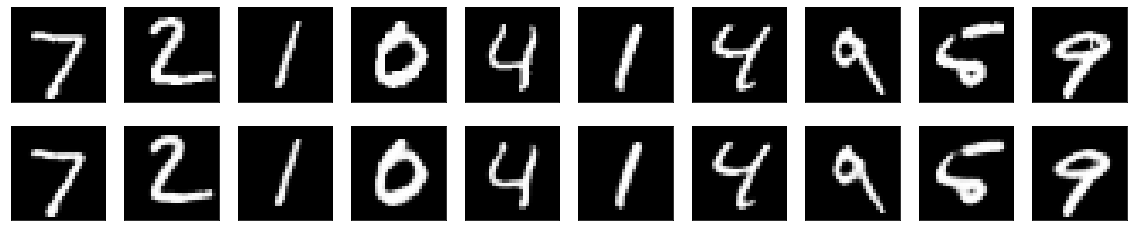

In [0]:
decoded_imgs = autoencoder_2.predict(x_test)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    orig = x_test[index].reshape(28, 28)
    plt.imshow(orig)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    predict = decoded_imgs[index].reshape(28, 28)
    plt.imshow(predict)
    # print(loss(predict, orig))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## **Conclusion from Task 1**

### ANN:
##### *Adding an extra layer at encoder and decoder made the network deep, more accurate, and efficient to train.*

##### *It increased the number of trainable parameters (weights) in the hidden layers of the model which increased the model complexity, and leads to decrease in the validation loss.*

##### *Increasing number of neurons helped in extracting more features*

##### *Overall increasing the dimensional complexity leads to better learning about the data.*

##### *Small learning rate decay helped model to learn effectively as large rate resulted in probably learning a sub-optimal set of weights too fast, leading to rapid changes*

##### *Hence, better image is obtained after fitting the new models compared to the basic ANN given model.*

**ANN Architecture 1 MSE Loss: 1.5013**

**ANN Architecture 2 MSE Loss: 0.3885**

**ANN Architecture 2 comes out to be better ANN model.**


### CNN:

##### *Convolutional layers are providing a meaningful, low-dimensional feature space to preserve the relationship between pixels in the input image.*

##### *Pooling layers progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. Pooling layer operates on each feature map independently.*

##### *Adding an extra layer at encoder and decoder made the network deep, more accurate, and efficient to train.*

##### *More layers with less stride factor extracted more features from the input data. It also leads to the increase in the number of weights in a network and the trainable parameters.*

##### *Adadelta(an adaptive learning rate optimiser) continues learning even when many updates have been done(Used in CNN Architecture 1)*

##### *Adam(A Method for Stochastic Optimization) used in CNN Architecture2*

##### *Combination of Adam with low learning rate is performing better*

##### *Small learning rate decay helped model to learn effectively as large rate resulted in probably learning a sub-optimal set of weights too fast leading to rapid changes*

**CNN Architecture 1: val_loss: 0.0949**

**CNN Architecture 2: val_loss: 0.0670**

*Increasing the number of layers at CNN Archtecture 2 helped model to train better. More filters at lower layers in encoder and decoder extracted more number of features. Hence, validation loss is less in CNN Architecture 2 compared to other models of CNN.*

**CNN Architecture 2 comes out to be better CNN model.**

## **Task 2 for Denoising autoencoder**

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


### Data Dimensions:

x_train: (60000, 28, 28, 1)

x_test: (10000, 28, 28, 1)

x_train_noisy: (60000, 28, 28, 1)

x_test_noisy: (10000, 28, 28, 1)

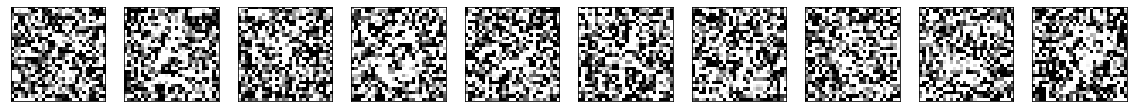

In [0]:
# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Task 2 Dense Architecture for Noise Removal**

#### Changes implemented:

```
Encoder: 3 Layers (256, 128, 128)

Decoder: 4 Layers (128, 128, 256, 784)

Optimizer: Adam

Loss Function: MSE

Batch size: 30

Learning Rate: 1e-3

```



In [0]:
x_train_flat = np.reshape(x_train, (len(x_train), 784))
x_test_flat = np.reshape(x_test, (len(x_test), 784))

x_train_noisy_flat = x_train_noisy.astype('float32')
x_test_noisy_flat = x_test_noisy.astype('float32')

x_train_noisy_flat = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_test_noisy_flat = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))

input_img = tf.keras.layers.Input(shape=(784))

x = tf.keras.layers.Dense(256, activation='relu')(input_img)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(x)

model = tf.keras.models.Model(input_img, decoded)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss=tf.keras.losses.MSE, metrics=[RootMeanSquaredError()])

In [0]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               330

In [0]:
model.fit(x_train_noisy_flat, x_train_flat, epochs=100, batch_size=30, 
                shuffle=True, validation_data=(x_test_noisy_flat, x_test_flat))

Epoch 1/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0542 - root_mean_squared_error: 0.2328 - val_loss: 0.0471 - val_root_mean_squared_error: 0.2169
Epoch 2/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0437 - root_mean_squared_error: 0.2090 - val_loss: 0.0420 - val_root_mean_squared_error: 0.2050
Epoch 3/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0407 - root_mean_squared_error: 0.2018 - val_loss: 0.0400 - val_root_mean_squared_error: 0.2001
Epoch 4/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0388 - root_mean_squared_error: 0.1970 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1961
Epoch 5/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0375 - root_mean_squared_error: 0.1935 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1948
Epoch 6/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0365 - root_mean_squared_error: 0.1911 - val_l

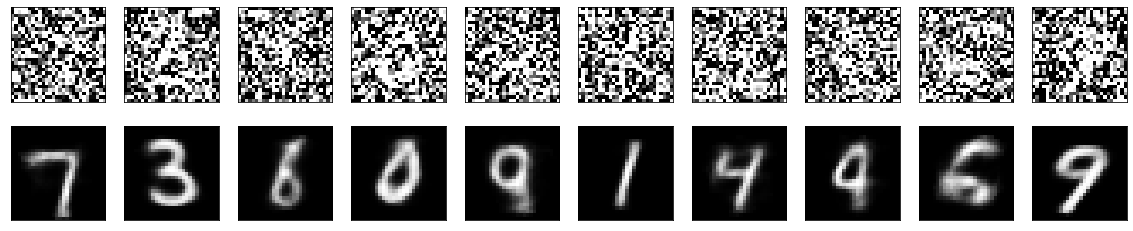

In [0]:
decoded_imgs = model.predict(x_test_noisy_flat)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    orig = x_test_noisy_flat[index].reshape(28, 28)
    plt.imshow(orig)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    predict = decoded_imgs[index].reshape(28, 28)
    plt.imshow(predict)
    # print(loss(predict, orig))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**Result:**

*Dense Architecture is not able to remove the noise properly.*

### **Task 2 CNN Architecture for Noise Removal**

#### Changes implemented:

```
Encoder: 6 Layers 
3 Convolution(64, 64, 32)
3 Max Pooling(size = 2)

Decoder: 7 Layers
4 Convolution(32, 64, 64, 1)
3 Max Pooling(size = 2)

Batch size = 64
Optimizer: Adam
Loss Function: Binary Crossentropy
Learning Rate: 1e-3

```



In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.Dropout(rate=0.20)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Dropout(rate=0.20)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_2 = tf.keras.models.Model(input_img, decoded)
autoencoder_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=[RootMeanSquaredError()])

In [0]:
autoencoder_2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0   

In [0]:
# This will train for 100 epochs
autoencoder_2.fit(x_train_noisy, x_train, epochs=100, batch_size=64, 
                shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1959 - root_mean_squared_error: 0.2081 - val_loss: 0.1775 - val_root_mean_squared_error: 0.1945
Epoch 2/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1695 - root_mean_squared_error: 0.1859 - val_loss: 0.1680 - val_root_mean_squared_error: 0.1853
Epoch 3/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1657 - root_mean_squared_error: 0.1827 - val_loss: 0.1637 - val_root_mean_squared_error: 0.1808
Epoch 4/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1634 - root_mean_squared_error: 0.1806 - val_loss: 0.1616 - val_root_mean_squared_error: 0.1794
Epoch 5/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1618 - root_mean_squared_error: 0.1791 - val_loss: 0.1623 - val_root_mean_squared_error: 0.1801
Epoch 6/100
938/938 [==============================] - 6s 7ms/step - loss: 0.1604 - root_mean_squared_error: 0.1779 - val_loss: 0.1587 

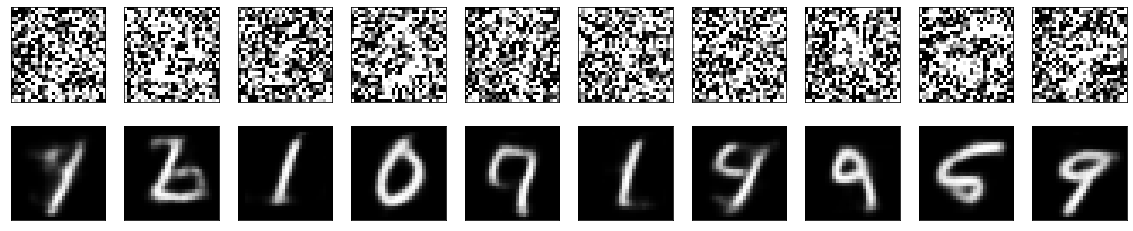

In [0]:
decoded_imgs = autoencoder_2.predict(x_test_noisy)
number = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for index in range(number):
    # display noisy
    ax = plt.subplot(2, number, index + 1)
    orig = x_test_noisy[index].reshape(28, 28)
    plt.imshow(orig)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    predict = decoded_imgs[index].reshape(28, 28)
    plt.imshow(predict)
    # print(loss(predict, orig))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show() 

## **Conclusion from Task 2**

**ANN Architecture val_root_mean_squared_error: 0.1923**

**CNN Architecture val_root_mean_squared_error: 0.1692**

##### *Convolution Autoencoders keep the spatial information of the input image data as they are, and extract it. These layers are providing a meaningful, low-dimensional feature space to preserve the relationship between pixels in the input image.*

##### *Encoder and decoder together learn the model to remove the particular noise present in the images.*

##### *We cannot compare the loss of both the models since both are different losses. Both the architectures were not able to predict clearer images and their output looks almost similar.*

## **Task 3 for Text Reconstruction Application**


#### Upload the zip files to the google drive and connect it to Colab to run the below script. 
*   train.zip
*   train_cleaned.zip
*   test.zip


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pathlib import Path
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
np.random.seed(111)   

In [0]:
auth.authenticate_user()
g_auth = GoogleAuth()
g_auth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(g_auth)

In [0]:
file_id = drive.ListFile({'q':"title='train.zip'"}).GetList()[0]
f1 = drive.CreateFile({'id': file_id['id']})
f1.GetContentFile('train.zip')

file_id = drive.ListFile({'q':"title='train_cleaned.zip'"}).GetList()[0]
f2 = drive.CreateFile({'id': file_id['id']})
f2.GetContentFile('train_cleaned.zip')

file_id = drive.ListFile({'q':"title='test.zip'"}).GetList()[0]
f3 = drive.CreateFile({'id': file_id['id']})
f3.GetContentFile('test.zip')

In [0]:
!unzip train.zip
!unzip train_cleaned.zip
!unzip test.zip

In [0]:
path_files = '/content/'

In [0]:
train_directory = os.path.join(path_files,
                         'train')
train_cleaned_directory = os.path.join(path_files,
                         'train_cleaned')
test_directory = os.path.join(path_files,
                        'test')

In [0]:
X = []
Y = []
X_test = []

for img in os.listdir(train_directory):
    img = load_img(train_directory + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in os.listdir(train_cleaned_directory):
    img = load_img(train_cleaned_directory + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in os.listdir(test_directory):
    img = load_img(test_directory + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X_test.append(img)
    if len(X_test) == 4:
      break


X = np.array(X)
Y = np.array(Y)
X_test = np.array(X_test)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)

### **Task 3 Dense Architecture for Text Reconstruction Application**

#### Changes implemented:

```
Encoder: 2 Layers (32, 16)

Decoder: 3 Layers (16, 32, 226800)

Optimizer: Adam

Loss Function: MSE

Batch size: 5

Learning Rate: 1e-3

```



In [0]:
# Lets' define our autoencoder now
def build_autoenocder_dense():
  input_img = tf.keras.layers.Input(shape=(226800))
  x = tf.keras.layers.Dense(32, activation='relu')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dense(16, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  
  x = tf.keras.layers.Dense(16, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dense(32, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  decoded = tf.keras.layers.Dense(226800, activation='sigmoid')(x)
  
  autoencoder = tf.keras.models.Model(inputs=input_img, outputs=decoded)
  autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss=tf.keras.losses.MSE, metrics = [RootMeanSquaredError()]) #loss=tf.keras.losses.MSE
  return autoencoder

autoencoder_dense = build_autoenocder_dense()

### Data Dimensions:

X_train: (129, 420, 540, 1)

Y_train: (129, 420, 540, 1)

X_valid: (15, 420, 540, 1)

Y_valid: (15, 420, 540, 1)

X_train_flat: (129, 226800)

Y_train_flat: (129, 226800)

X_valid_flat: (15, 226800)

Y_valid_flat: (15, 226800)

X_test_flat: (2, 226800)

In [0]:
# Train your model
X_train_flat = np.reshape(X_train, (len(X_train), 226800))
X_valid_flat = np.reshape(X_valid, (len(X_valid), 226800))
Y_train_flat = np.reshape(Y_train, (len(Y_train), 226800))
Y_valid_flat = np.reshape(Y_valid, (len(Y_valid), 226800))

X_test_flat  = np.reshape(X_test, (len(X_test), 226800))

autoencoder_dense.fit(X_train_flat, Y_train_flat, epochs=100, batch_size=5, validation_data=(X_valid_flat, Y_valid_flat))

Epoch 1/100
26/26 [==============================] - 1s 30ms/step - loss: 0.2216 - root_mean_squared_error: 0.4708 - val_loss: 0.2185 - val_root_mean_squared_error: 0.4674
Epoch 2/100
26/26 [==============================] - 0s 17ms/step - loss: 0.2171 - root_mean_squared_error: 0.4660 - val_loss: 0.2118 - val_root_mean_squared_error: 0.4602
Epoch 3/100
26/26 [==============================] - 0s 17ms/step - loss: 0.2109 - root_mean_squared_error: 0.4593 - val_loss: 0.1988 - val_root_mean_squared_error: 0.4459
Epoch 4/100
26/26 [==============================] - 0s 17ms/step - loss: 0.2034 - root_mean_squared_error: 0.4511 - val_loss: 0.1758 - val_root_mean_squared_error: 0.4193
Epoch 5/100
26/26 [==============================] - 0s 17ms/step - loss: 0.1956 - root_mean_squared_error: 0.4423 - val_loss: 0.1630 - val_root_mean_squared_error: 0.4037
Epoch 6/100
26/26 [==============================] - 0s 17ms/step - loss: 0.1841 - root_mean_squared_error: 0.4291 - val_loss: 0.1398 - val_

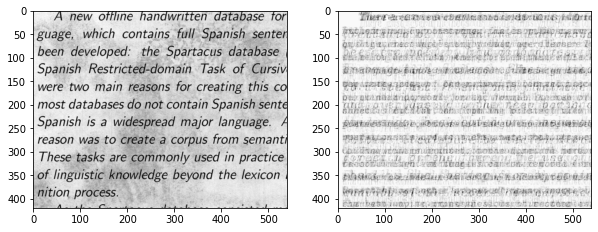

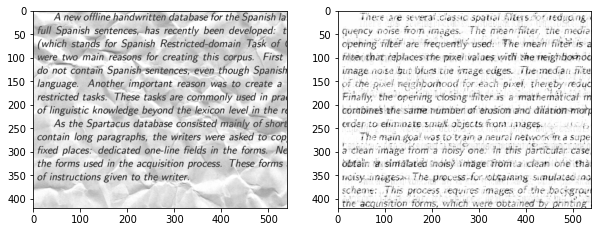

In [0]:
# Compute the prediction
predicted_label = autoencoder_dense.predict(X_test_flat)

for i in range(2):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_test_flat[i].reshape(420, 540)), cmap='gray')
  ax[1].imshow(predicted_label[i].reshape(420, 540), cmap='gray')
plt.show()

**Result:**

**val_root_mean_squared_error: 0.2193**

Text Reconstruction via Dense architecture doesn't perform well even after performing Batch Normalisation which is used to  standardize the inputs to a layer in a deep neural network.

### **Task 3 CNN Architecture 1 (Basic Model) for Text Reconstruction Application**

#### Changes implemented:

```
Encoder: 4 Layers 
2 Convolution(32, 32)
2 Max Pooling(size = 2)

Decoder: 5 Layers
3 Convolution(32, 32, 1)
2 Max Pooling(size = 2)

Batch size = 8
Optimizer: Adam
Loss Function: Binary Crossentropy
Learning Rate: 1e-3

```

In [0]:
# Lets' define our autoencoder now
def build_autoenocder_cnn_basic():
  
  input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
  
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same', strides=(2, 2))(x)
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  
  autoencoder = tf.keras.models.Model(inputs = input_img, outputs = decoded)
  autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics = [RootMeanSquaredError()]) 
  return autoencoder

In [0]:
autoencoder_cnn_basic = build_autoenocder_cnn_basic()
autoencoder_cnn_basic.summary()
autoencoder_cnn_basic.fit(X_train, Y_train, epochs=100, batch_size=8, validation_data=(X_valid, Y_valid))

Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 420, 540, 32)      320       
_________________________________________________________________
batch_normalization_136 (Bat (None, 420, 540, 32)      128       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 210, 270, 32)      0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 210, 270, 32)      9248      
_________________________________________________________________
batch_normalization_137 (Bat (None, 210, 270, 32)      128       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 105, 135, 32)      0  

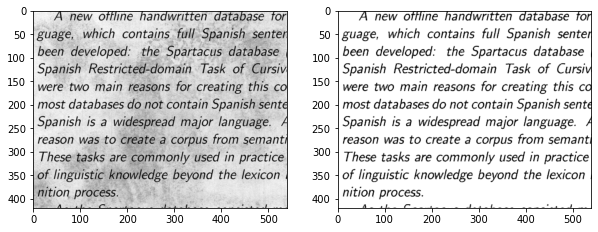

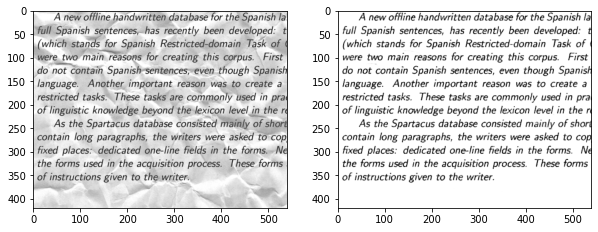

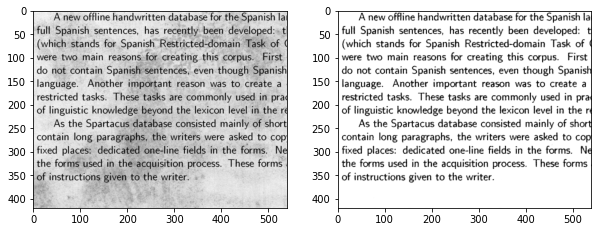

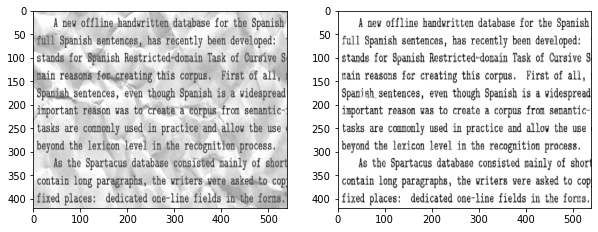

In [0]:
predicted_label_basic = np.squeeze(autoencoder_cnn_basic.predict(X_test))

for i in range(4):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_test[i]), cmap='gray')
  ax[1].imshow(predicted_label_basic[i], cmap='gray')
plt.show()

**Result:**

**val_root_mean_squared_error: 0.0743**

CNN basic architecture performs well with Batch Normalisation which aids in stabilising the network and helps in converging.

Lower Batch size here is used to train the model better though it takes more time to learn. Smaller batch size accelerate feedback.

### **Task 3 CNN Architecture 1(Complex Model) for Text Reconstruction Application**

#### Changes implemented:

```
Encoder: 4 Layers 
2 Convolution(32, 64)
2 Max Pooling(size = 2)

Decoder: 5 Layers
3 Convolution(64, 32, 1)
2 Max Pooling(size = 2)

Batch size = 3
Optimizer: Adam
Loss Function: MSE
Adaptive Learning Rate: 1e-2 to 1e-4

```



In [0]:
def build_autoenocder_cnn_check():
  
  input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
  
  x = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.leaky_relu, padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Dropout(rate=0.1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  
  x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu, padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  
  autoencoder = tf.keras.models.Model(inputs = input_img, outputs = decoded)
  autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-2), loss='mse', metrics = [RootMeanSquaredError()])
  return autoencoder

In [0]:
autoencoder_cnn_check = build_autoenocder_cnn_check()
autoencoder_cnn_check.summary()
callback_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'auto', factor = 0.1, min_lr = 0.0001)
autoencoder_cnn_check.fit(X_train, Y_train, epochs=100, batch_size=3, validation_data=(X_valid, Y_valid), callbacks = callback_lr)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 420, 540, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 420, 540, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 210, 270, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 210, 270, 32)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 210, 270, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 210, 270, 64)      256 

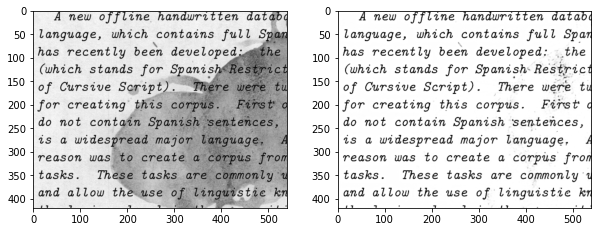

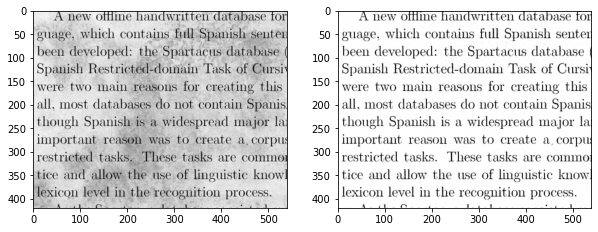

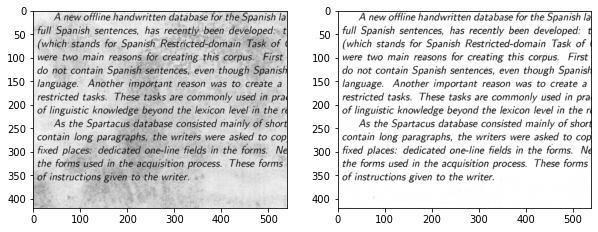

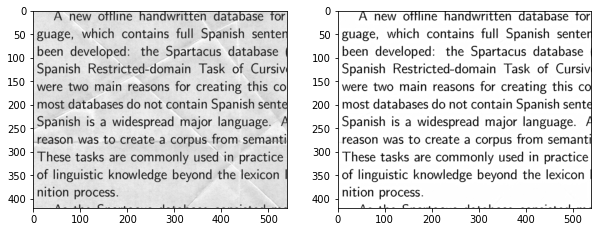

In [0]:
predicted_label_1 = np.squeeze(autoencoder_cnn_check.predict(X_test))

for i in range(4):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_test[i]), cmap='gray')
  ax[1].imshow(predicted_label_1[i], cmap='gray')
plt.show()


**Result:**

**val_root_mean_squared_error: 0.0473**

This complex architecture performs well with Batch Normalisation which aids in stabilising the network and helps in converging.

Deep learning neural networks are likely to quickly overfit a training dataset with few examples.

Hence, Dropout here forces a neural network to learn more robust features and aids in reducing the validation root mean square error.

Lower Batch size here is used to train the model better though it takes more time to learn. Small batch size accelerate feedback.


**Leaky Relu**

Relu might have problem sometimes where some neurons die for all inputs and remain inactive and hence, no gradient flows. This can be corrected by making use of Leaky ReLU.

**Adaptive Learning Rate**

Here model is performing better with adaptive learning rate. If the validation loss remain same for few epochs, learning rate changes and trains the model with the new value.


In this case it helped in reducing the root mean square error value.

### **Task 3 CNN Architecture 2(Complex Model) for Text Reconstruction Application**

#### Changes implemented:

```
Encoder: 4 Layers 
2 Convolution(32, 64)
2 Max Pooling(size = 2)

Decoder: 5 Layers
3 Convolution(64, 32, 1)
2 Max Pooling(size = 2)

Batch size = 5
Optimizer: Adam
Loss Function: MSE
Learning Rate: 1e-3

```



In [0]:
def build_autoenocder_cnn_1():
  
  input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  
  autoencoder = tf.keras.models.Model(inputs = input_img, outputs = decoded)
  autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss='mse', metrics = [RootMeanSquaredError()]) 
  return autoencoder

In [0]:
autoencoder_cnn_1 = build_autoenocder_cnn_1()
autoencoder_cnn_1.summary()
autoencoder_cnn_1.fit(X_train, Y_train, epochs=100, batch_size=5, validation_data=(X_valid, Y_valid))

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 420, 540, 32)      320       
_________________________________________________________________
batch_normalization_144 (Bat (None, 420, 540, 32)      128       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 210, 270, 32)      0         
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 210, 270, 64)      18496     
_________________________________________________________________
batch_normalization_145 (Bat (None, 210, 270, 64)      256       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 105, 135, 64)      0  

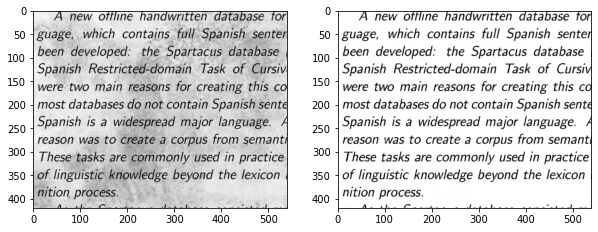

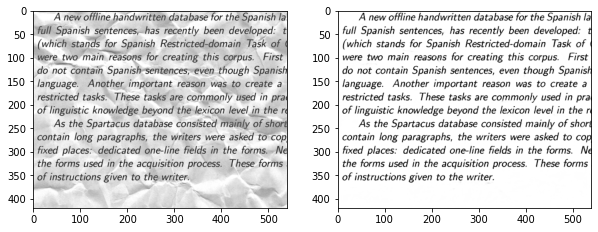

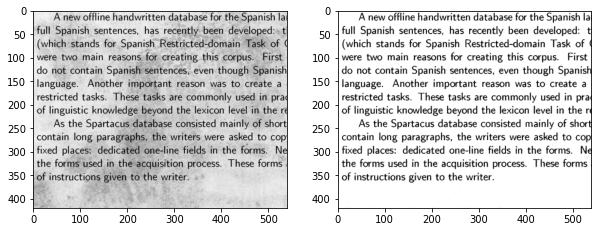

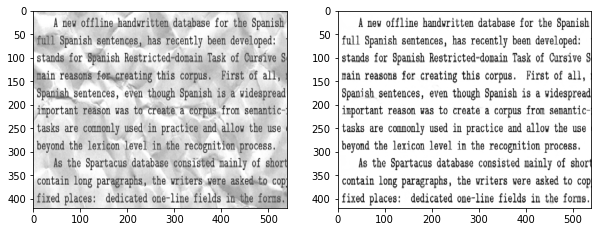

In [0]:
predicted_label_1 = np.squeeze(autoencoder_cnn_1.predict(X_test))

for i in range(4):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_test[i]), cmap='gray')
  ax[1].imshow(predicted_label_1[i], cmap='gray')
plt.show()


**Result:**

**val_root_mean_squared_error: 0.0630**

This is the second complex architecture which also uses Batch normalisation.

Here more layers are used at last layer of encoder and first layer of decoder so that we have more filters there to capture the minute details.

This prevents the loss of important features even at lower dimension.

Lower learning rate trains the model more effectively by updating weights more number of times than the previous models which ultimately leads to lesser RMSE.

But here we haven't used adaptive learning rate, and drop out which is probably the reason of getting a higher RMSE than the previous model.

### **Task 3 CNN Architecture 3 (Complex Model) for Text Reconstruction Application**

#### Changes implemented:

```
Encoder: 4 Layers 
2 Convolution(64, 128)
2 Max Pooling(size = 2)

Decoder: 5 Layers
3 Convolution(128, 64, 1)
2 Max Pooling(size = 2)

Batch size = 5
Optimizer: Adam
Loss Function: MSE
Learning Rate: 1e-3

```


In [0]:
# Lets' define our autoencoder now
def build_autoenocder_cnn_2():
  
  input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  
  x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  
  autoencoder = tf.keras.models.Model(inputs = input_img, outputs = decoded)
  autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss='mse', metrics=[RootMeanSquaredError()])
  return autoencoder

In [0]:
autoencoder_cnn_2 = build_autoenocder_cnn_2()
autoencoder_cnn_2.summary()
autoencoder_cnn_2.fit(X_train, Y_train, epochs=100, batch_size=5, validation_data=(X_valid, Y_valid))

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 420, 540, 64)      640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 420, 540, 64)      256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 210, 270, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 210, 270, 128)     73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 210, 270, 128)     512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 105, 135, 128)     0   

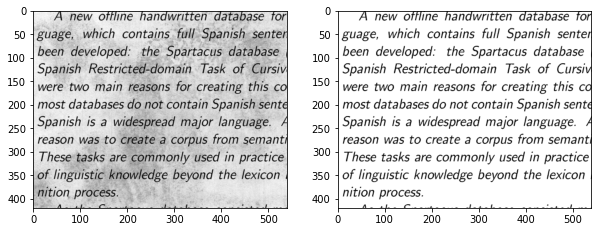

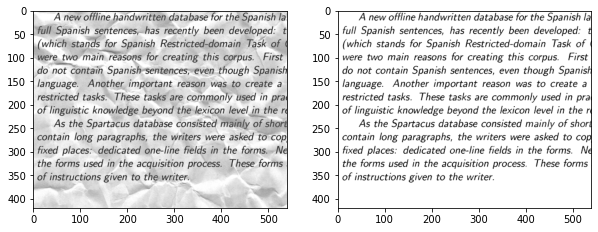

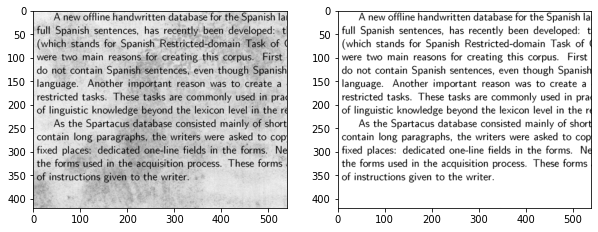

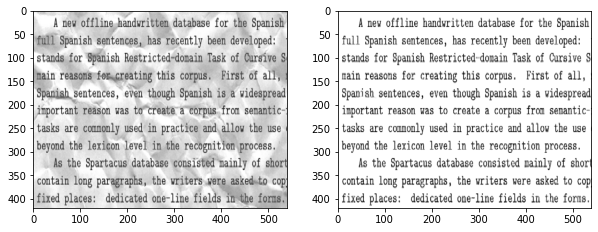

In [0]:
predicted_label_2 = np.squeeze(autoencoder_cnn_2.predict(X_test))

for i in range(4):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_test[i]), cmap='gray')
  ax[1].imshow(predicted_label_2[i], cmap='gray')
plt.show()

**Result:**

**val_root_mean_squared_error: 0.0421**

This is the third complex architecture which also uses Batch normalisation.

Here,  we further increased the number of layers at both layers of encoder and both layers of decoder which captures the low level details from the images.

Hence, lower RMSE is observed.



## **Conclusion from Task 3**
\
**ANN:**

ANN Basic Architecture val_root_mean_squared_error: 0.2193

\
**CNN:**

CNN Basic Architecture val_root_mean_squared_error: 0.0743

CNN Complex Architecture 1 val_root_mean_squared_error: 0.0473

CNN Complex Architecture 2 val_root_mean_squared_error: 0.0630

CNN Complex Architecture 3 val_root_mean_squared_error: 0.0421

\
Several CNN basic and complex models have been tested on different configurations. Few of the configurations improved the accuracy by implementing adaptive learning rate, using lower batch size and dropout as in case of CNN Architecture 1.

Adaptive learning rate helped in efficient training by changing the learning rate after some fixed patience level.

Drop out also reduced the chances of overfitting and resulted in lower root mean square error.

Small learning rate decay trained model effectively as large rate resulted in probably learning a sub-optimal set of weights too fast leading to rapid changes.

Epoch size is also fixed to 100 which leads to the improvement in performance. If we train the network for a fewer epochs, it might lead to underfitting of the data.

In other models, RMSE were not upto the mark because of the the lesser number of neurons in the layer, i.e. having lesser number of filters to capture the minute details of an image. Although, RMSE might improve if we further reduce the batch size, but in that case it will take much more longer to train the model and it might overfit.

Overall, CNN complex architecture 1 and 3 performed better.

